# Credit Card Prediction

## Importing required primary libraries

In [1]:
import numpy as np                   # For creating matrices and for number operations
import pandas as pd                  # For manipulating and reading data
import matplotlib.pyplot as plt      # for ploting graphs
import seaborn as sns
sns.set_style("darkgrid")            # To plot heatmaps
import warnings                      # Hide warnings
warnings.filterwarnings('ignore')

## Data Viewing

In [2]:
df = pd.read_csv("Data/Primary/Job A Thon/Train.csv")          #Importing data as dataframe with pandas
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [3]:
df.info()          # Getting info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


<AxesSubplot:>

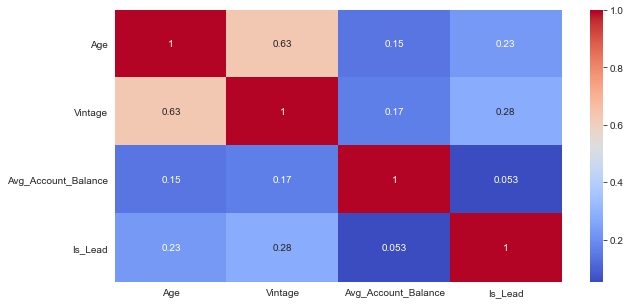

In [4]:
plt.figure(figsize = (10 , 5))                              # Plotting heatmap for data correlations in dataframe with seaborn
sns.heatmap(df.corr() , annot = True , cmap = "coolwarm")          

<AxesSubplot:>

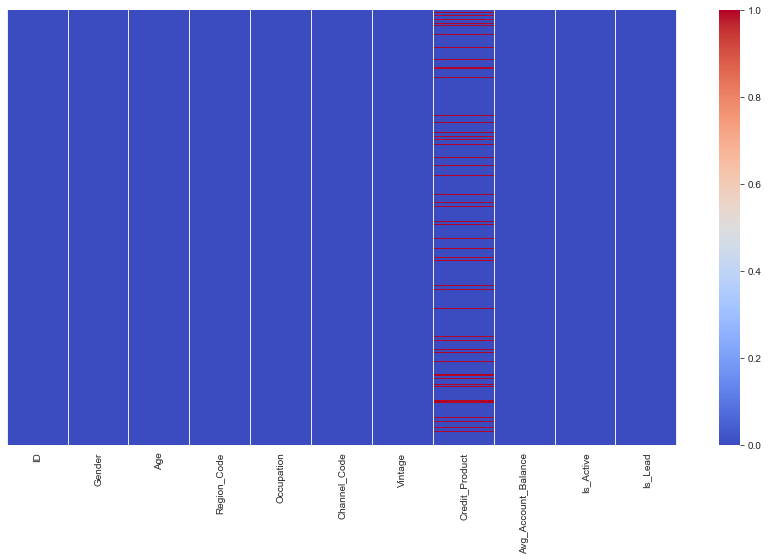

In [5]:
plt.figure(figsize = (15 , 8))                                      # Heatmap for missing values in dataframe
sns.heatmap(df.isnull() , cmap = "coolwarm" , yticklabels = False)

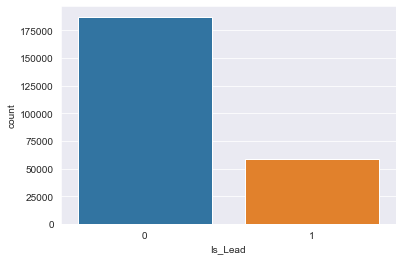

In [6]:
# Getting value counts of target column
sns.countplot(data = df , x = "Is_Lead");

In [7]:
df.isna().sum()    # Checking for number of missing values

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

## EDA Tools

In [8]:
# Getting detailed analysis on unique , value_counts

for i in df.columns:
    print(f"The number of unique values in {i} column is/are {len(df[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {df[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in ID column is/are 245725


The unique values in ID column is/are ['NNVBBKZB' 'IDD62UNG' 'HD3DSEMC' ... 'GEHAUCWT' 'GE7V8SAH' 'BOCZSWLJ']


The value counts for each value in ID column is/are :  
3CYYS8SJ    1
SFA49KZY    1
DDJEKBSV    1
KVTJCULR    1
WYGFMTZG    1
           ..
HD88VWJC    1
XN9C4TSQ    1
ASFYPESK    1
KMUGU77A    1
C7WTWDJD    1
Name: ID, Length: 245725, dtype: int64



****************************************************************************************************



The number of unique values in Gender column is/are 2


The unique values in Gender column is/are ['Female' 'Male']


The value counts for each value in Gender column is/are :  
Male      134197
Female    111528
Name: Gender, dtype: int64



****************************************************************************************************



The number of unique values in Age column is/are 63


The unique values in Age column is/are [73 30 56 34 62 48 40 55 53 27 31 79

In [9]:
# Dropping ID column as it has all unique values and will not contribute to our model
df.drop(["ID"] , axis = 1 , inplace = True)
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [10]:
# Filling Nan values with constant value

df["Credit_Product"].fillna("Unknown" , inplace = True)

In [11]:
df["Credit_Product"].value_counts()

No         144357
Yes         72043
Unknown     29325
Name: Credit_Product, dtype: int64

In [12]:
# Loading test dataset

tt = pd.read_csv("Data/Primary/Job A Thon/Test.csv")
tt.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [13]:
# Dropping ID column

ids = tt["ID"]
tt.drop(["ID"] , axis = 1 , inplace = True)
tt.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Male,29,RG254,Other,X1,25,Yes,742366,No
1,Male,43,RG268,Other,X2,49,NaN,925537,No
2,Male,31,RG270,Salaried,X1,14,No,215949,No
3,Male,29,RG272,Other,X1,33,No,868070,No
4,Female,29,RG270,Other,X1,19,No,657087,No


In [14]:
# Checking for number of null values
tt.isna().sum() , len(tt)

(Gender                     0
 Age                        0
 Region_Code                0
 Occupation                 0
 Channel_Code               0
 Vintage                    0
 Credit_Product         12522
 Avg_Account_Balance        0
 Is_Active                  0
 dtype: int64,
 105312)

In [15]:
# Filling Nan values with constant value

tt["Credit_Product"].fillna("Unknown" , inplace = True)

In [16]:
# Getting detailed analysis on unique , value_counts

for i in tt.columns:
    print(f"The number of unique values in {i} column is/are {len(tt[i].unique())}")
    print("\n")
    print(f"The unique values in {i} column is/are {tt[i].unique()}")
    print("\n")
    print(f"The value counts for each value in {i} column is/are :  \n{tt[i].value_counts()}")
    print("\n\n")
    print("*"*100)
    print("\n\n")

The number of unique values in Gender column is/are 2


The unique values in Gender column is/are ['Male' 'Female']


The value counts for each value in Gender column is/are :  
Male      57705
Female    47607
Name: Gender, dtype: int64



****************************************************************************************************



The number of unique values in Age column is/are 62


The unique values in Age column is/are [29 43 31 60 69 30 54 45 42 49 26 51 75 47 25 73 46 67 55 65 38 76 63 33
 28 48 70 44 61 36 27 34 52 64 39 68 35 50 59 58 74 72 56 32 57 78 37 41
 53 40 24 66 62 77 82 81 85 79 80 83 71 84]


The value counts for each value in Age column is/are :  
28    6347
29    5700
27    5610
30    4618
26    3877
      ... 
81     359
83     328
82     328
84     292
85     284
Name: Age, Length: 62, dtype: int64



****************************************************************************************************



The number of unique values in Region_Code column 

<AxesSubplot:>

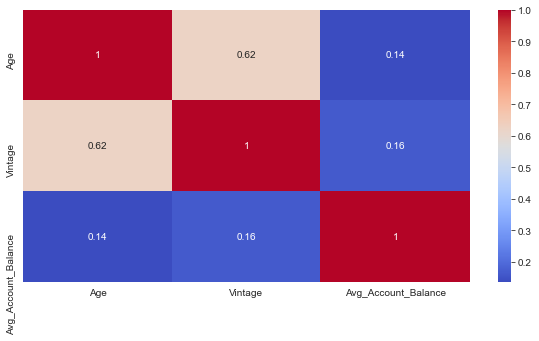

In [17]:
# Plotting heatmap for data correlations in dataframe with seaborn

plt.figure(figsize = (10 , 5))
sns.heatmap(tt.corr() , annot = True , cmap = "coolwarm")

In [18]:
df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


## Data Visualiztion

### Pairplots

<Figure size 720x720 with 0 Axes>

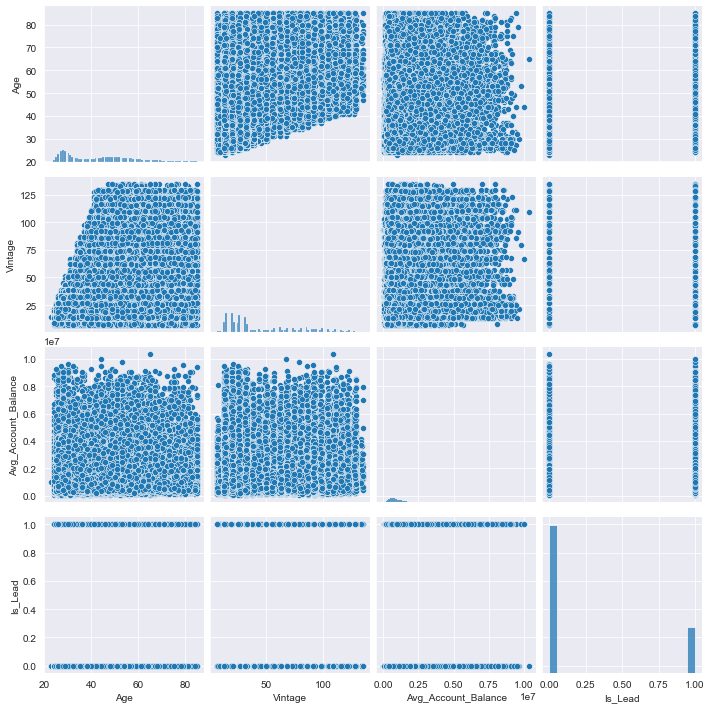

In [19]:
plt.figure(figsize = (10 , 10))
sns.pairplot(data = df)

### Histplots

<AxesSubplot:xlabel='Age', ylabel='Count'>

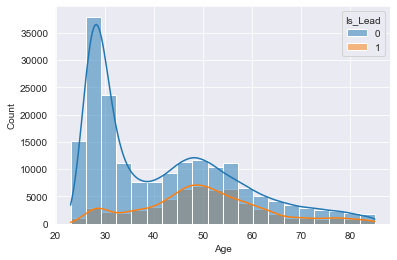

In [20]:
sns.histplot(data = df , x = "Age" , kde = True , hue = "Is_Lead" , bins = 20)

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

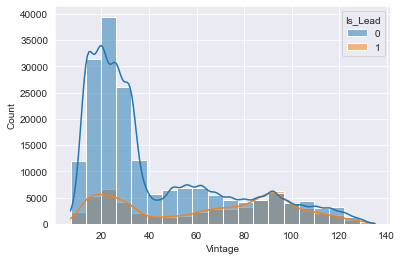

In [21]:
sns.histplot(data = df , x = "Vintage" , kde = True , hue = "Is_Lead" , bins = 20)

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

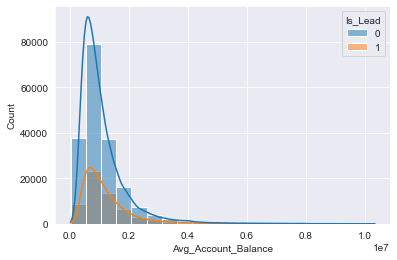

In [22]:
sns.histplot(data = df , x = "Avg_Account_Balance" , kde = True , hue = "Is_Lead" , bins = 20)

### Count plots

<AxesSubplot:xlabel='Gender', ylabel='count'>

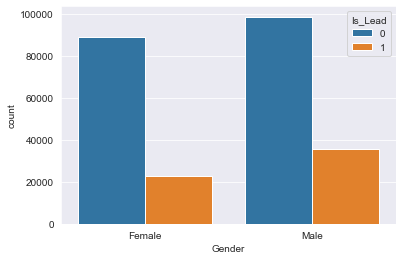

In [23]:
sns.countplot(data = df , x = "Gender" , hue = "Is_Lead")

<AxesSubplot:xlabel='Occupation', ylabel='count'>

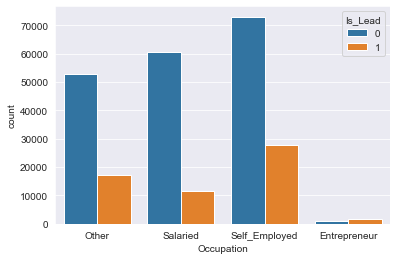

In [24]:
sns.countplot(data = df , x = "Occupation" , hue = "Is_Lead")

<AxesSubplot:xlabel='Credit_Product', ylabel='count'>

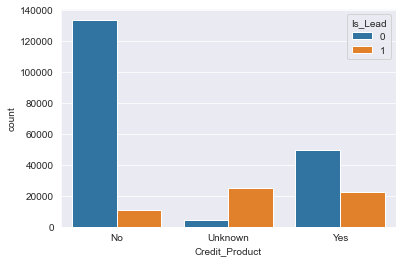

In [25]:
sns.countplot(data = df , x = "Credit_Product" , hue = "Is_Lead")

<AxesSubplot:xlabel='Is_Active', ylabel='count'>

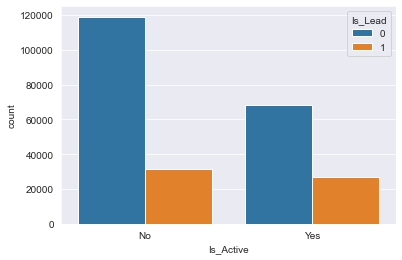

In [26]:
sns.countplot(data = df , x = "Is_Active" , hue = "Is_Lead")

## Data Preprocessing

In [27]:
for i in ["Age" , "Vintage" , "Avg_Account_Balance"]:
    df[i] = np.log(df[i] + 1)
    tt[i] = np.log(tt[i] + 1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

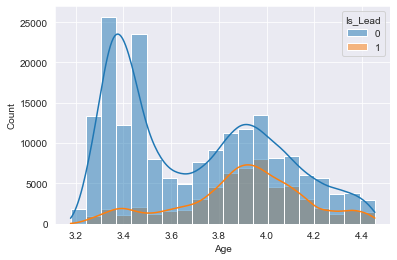

In [28]:
sns.histplot(data = df , x = "Age" , kde = True , hue = "Is_Lead" , bins = 20)

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

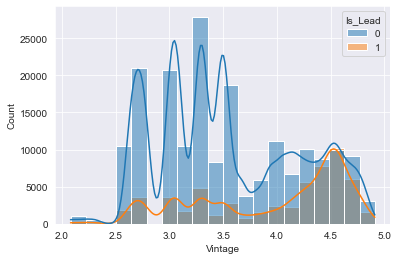

In [29]:
sns.histplot(data = df , x = "Vintage" , kde = True , hue = "Is_Lead" , bins = 20)

<AxesSubplot:xlabel='Avg_Account_Balance', ylabel='Count'>

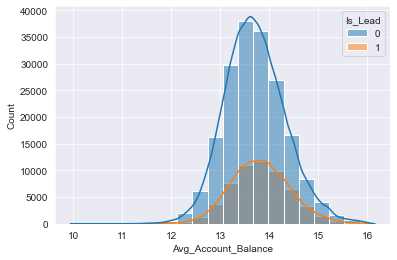

In [30]:
sns.histplot(data = df , x = "Avg_Account_Balance" , kde = True , hue = "Is_Lead" , bins = 20)

In [31]:
# Getting Dummies columns , dropping first column in dummies to get rid of multicollinearity

df = pd.get_dummies(df , columns = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , prefix = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , drop_first = True)
tt = pd.get_dummies(tt , columns = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , prefix = ["Gender" , "Region_Code" , "Occupation" , "Channel_Code" , "Credit_Product" , "Is_Active"] , drop_first = True)

In [32]:
df.head()

,Age,Vintage,Avg_Account_Balance,Is_Lead,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,4.304065,3.784190,13.860194,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
1,3.433987,3.496508,13.274207,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,4.043051,3.295837,14.210465,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,3.555348,2.995732,13.061456,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3.433987,3.526361,13.695361,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
tt.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,3.401197,3.258097,13.517599,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,3.784190,3.912023,13.738130,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,3.465736,2.708050,12.282802,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.401197,3.526361,13.674029,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,3.401197,2.995732,13.395573,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       245725 non-null  float64
 1   Vintage                   245725 non-null  float64
 2   Avg_Account_Balance       245725 non-null  float64
 3   Is_Lead                   245725 non-null  int64  
 4   Gender_Male               245725 non-null  uint8  
 5   Region_Code_RG251         245725 non-null  uint8  
 6   Region_Code_RG252         245725 non-null  uint8  
 7   Region_Code_RG253         245725 non-null  uint8  
 8   Region_Code_RG254         245725 non-null  uint8  
 9   Region_Code_RG255         245725 non-null  uint8  
 10  Region_Code_RG256         245725 non-null  uint8  
 11  Region_Code_RG257         245725 non-null  uint8  
 12  Region_Code_RG258         245725 non-null  uint8  
 13  Region_Code_RG259         245725 non-null  u

In [35]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       105312 non-null  float64
 1   Vintage                   105312 non-null  float64
 2   Avg_Account_Balance       105312 non-null  float64
 3   Gender_Male               105312 non-null  uint8  
 4   Region_Code_RG251         105312 non-null  uint8  
 5   Region_Code_RG252         105312 non-null  uint8  
 6   Region_Code_RG253         105312 non-null  uint8  
 7   Region_Code_RG254         105312 non-null  uint8  
 8   Region_Code_RG255         105312 non-null  uint8  
 9   Region_Code_RG256         105312 non-null  uint8  
 10  Region_Code_RG257         105312 non-null  uint8  
 11  Region_Code_RG258         105312 non-null  uint8  
 12  Region_Code_RG259         105312 non-null  uint8  
 13  Region_Code_RG260         105312 non-null  u

<AxesSubplot:>

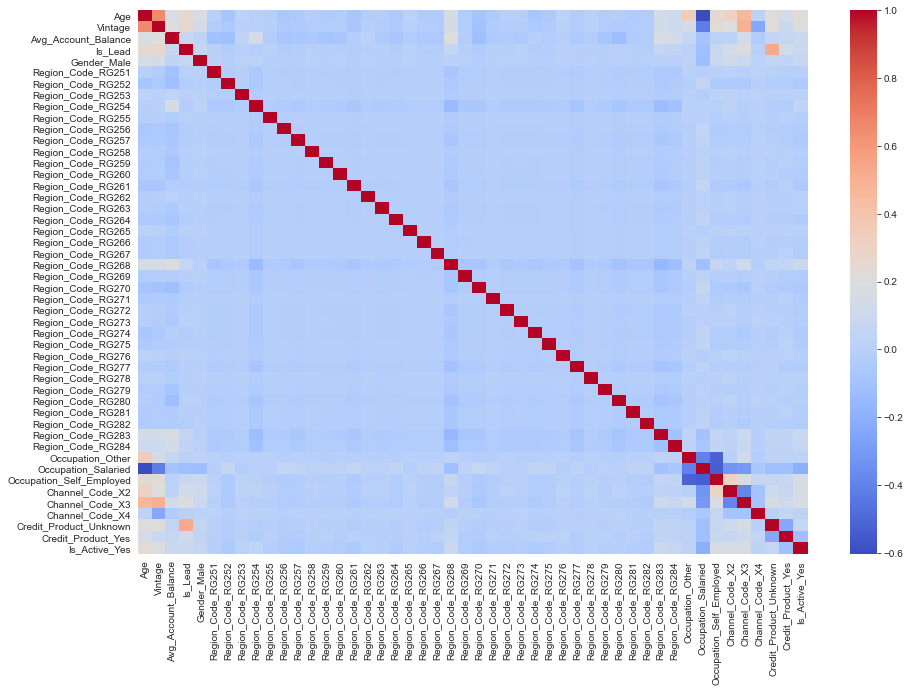

In [36]:
plt.figure(figsize = (15 , 10))
sns.heatmap(df.corr() , cmap = "coolwarm")

## Train Test Splitting

In [37]:
from sklearn.model_selection import train_test_split
X = df.drop(["Is_Lead"] , axis = 1)
y = df["Is_Lead"]
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(196580, 49145, 196580, 49145)

## Data Preprocessing

In [38]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
scaler = StandardScaler()
X_train[["Age" , "Vintage" , "Avg_Account_Balance"]] = scaler.fit_transform(X_train[["Age" , "Vintage" , "Avg_Account_Balance"]])
X_test[["Age" , "Vintage" , "Avg_Account_Balance"]] = scaler.transform(X_test[["Age" , "Vintage" , "Avg_Account_Balance"]])
tt[["Age" , "Vintage" , "Avg_Account_Balance"]] = scaler.transform(tt[["Age" , "Vintage" , "Avg_Account_Balance"]])

## Upsampling with SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
y_train.value_counts()

0    149917
1     46663
Name: Is_Lead, dtype: int64

In [40]:
sm = SMOTE(random_state = 42)
X_train_1, y_train_1 = sm.fit_resample(X_train , y_train.ravel())
sum(y_train_1 == 1) , sum(y_train_1 == 0)

(149917, 149917)

In [41]:
X_train.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
76936,0.433421,-1.263734,1.162077,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
98532,1.658714,-0.208621,-0.651416,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
116257,-1.074602,-0.799587,0.221663,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
95211,-0.348016,0.034860,-0.304673,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
173053,0.951715,-0.867390,-1.183056,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [42]:
X_test.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
241356,2.053318,0.454157,-1.183866,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
150884,0.674618,0.733838,-0.533377,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
43550,-0.876231,-0.556106,1.366721,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
62555,-0.689890,-0.448093,1.624317,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
147096,-0.973817,-0.938502,1.370340,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model fitting and Evaluation

In [43]:
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix , roc_auc_score , f1_score , accuracy_score , classification_report , roc_curve , auc , plot_roc_curve
from sklearn.model_selection import cross_val_score

In [44]:
models = []
models.append(['XGBClassifier', XGBClassifier(learning_rate = 0.1 , objective = 'binary:logistic' , random_state = 42 , eval_metric='mlogloss')])
models.append(['AdaBoostClassifier', AdaBoostClassifier(random_state = 42)])
models.append(['RandomForest', RandomForestClassifier(random_state = 42)])
models.append(['Logistic Regression', LogisticRegression(random_state = 42)])
models.append(['KNeigbors', KNeighborsClassifier()])

In [45]:
def metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 10)
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    roc = roc_auc_score(y_test , model[1].predict_proba(X_test)[: , 1])
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    ac = auc(fpr, tpr)
    f1 = f1_score(y_test , preds)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"ROC AUC Score: {roc:.4f}")
    print('\n')
    
    print(f"F1 Score: {f1:.4f}")
    print("\n")
    
    print(f"AUC : {ac:.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")

    plt.figure(figsize = (8, 5))
    plot_roc_curve(model[1], X_test, y_test , color = '#FF4500')
    plt.plot([0, 1], [0, 1], linestyle = '--', color = '#7CFC00')
    plt.show()
    print("\n")
    print("*"*100)
    
    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(roc)
    sam.append(f1)
    sam.append(ac)
    
    return sam , mod

## Fitting on XGBClassifier



XGBClassifier


Confusion matrix : 



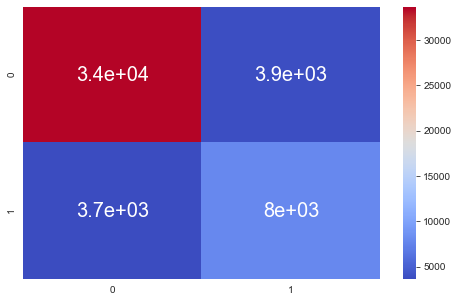



Training score : 0.8832


Test Score : 0.8468


K-fold accuracy : 0.8776


Standard Deviation of Accuracies in k-fold : 0.0579


ROC AUC Score: 0.8683


F1 Score: 0.6789


AUC : 0.7908


Classification report : 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     37520
           1       0.67      0.68      0.68     11625

    accuracy                           0.85     49145
   macro avg       0.79      0.79      0.79     49145
weighted avg       0.85      0.85      0.85     49145





<Figure size 576x360 with 0 Axes>

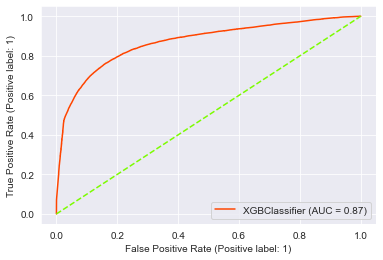



****************************************************************************************************



Wall time: 6min 16s


In [46]:
%%time

xgb = metrics(['XGBClassifier', XGBClassifier(learning_rate = 0.1, objective = 'binary:logistic' , random_state = 42 , eval_metric='mlogloss')] ,  X_train_1 , y_train_1 , X_test[X_test.columns].values , y_test.ravel() , params = False )

## Evaluating on Test Set

In [47]:
tt.head()

,Age,Vintage,Avg_Account_Balance,Gender_Male,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,...,Region_Code_RG284,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_Unknown,Credit_Product_Yes,Is_Active_Yes
0,-1.074602,-0.556106,-0.347720,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.102597,0.396993,0.007535,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,-0.876231,-1.357799,-2.336857,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,-1.074602,-0.165111,-0.095727,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,-1.074602,-0.938502,-0.544291,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [48]:
xgb

(['XGBClassifier',
  0.8831653514944936,
  0.8468206328212433,
  0.8776430909345606,
  0.05794532710629206,
  0.868343660728615,
  0.678866990871086,
  0.7907973267304033],
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
               gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', learning_rate=0.1, max_delta_step=0,
               max_depth=6, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=100, n_jobs=8,
               num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
               scale_pos_weight=1, subsample=1, tree_method='exact',
               validate_parameters=1, verbosity=None))

In [49]:
xgb_preds = xgb[1].predict(tt[tt.columns].values)

In [50]:
# Converting preds into DataFrame

data_xgb = {"ID" : ids , 
       "Is_Lead" : xgb_preds}

final_xgb = pd.DataFrame(data_xgb, columns = ["ID" , "Is_Lead"])
final_xgb.head(5)

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [51]:
final_xgb["Is_Lead"].value_counts()

0    79992
1    25320
Name: Is_Lead, dtype: int64

In [52]:
# # Getting preds into CSV file
# final_xgb.to_csv("Credit Card.csv" , index = False)